In [0]:

import keras
keras.__version__

'2.2.4'

In [0]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

**MODEL TRAINED ON IMDB DATASET**

In [0]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 20

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
maxlen = 20
model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_3 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 75us/step - loss: 0.6759 - acc: 0.6044 - val_loss: 0.6398 - val_acc: 0.6808
Epoch 2/10
20000/20000 [==============================] - 1s 59us/step - loss: 0.5658 - acc: 0.7428 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 58us/step - loss: 

25000/25000 [==============================] - 0s 16us/step
Test Loss: 0.5214694886779785 Test Accuracy: 0.75588


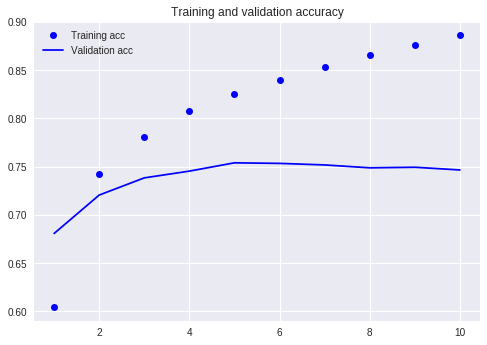

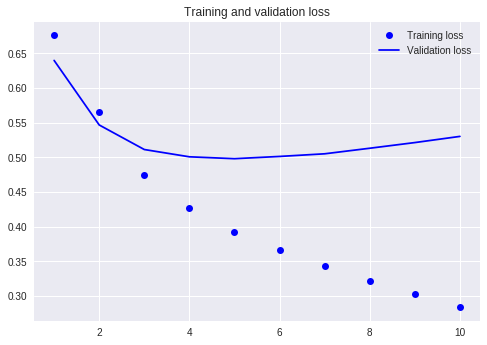

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##Model 2 (Increasing maxlen to 100)

In [0]:
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
maxlen = 100
model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 83us/step - loss: 0.6224 - acc: 0.6780 - val_loss: 0.4758 - val_acc: 0.8048
Epoch 2/10
20000/20000 [==============================] - 1s 70us/step - loss: 0.3735 - acc: 0.8504 - val_loss: 0.3533 - val_acc: 0.8464
Epoch 3/10
20000/20000 [==============================] - 1s 70us/step - loss: 

25000/25000 [==============================] - 0s 19us/step
Test Loss: 0.3753451611804962 Test Accuracy: 0.8498


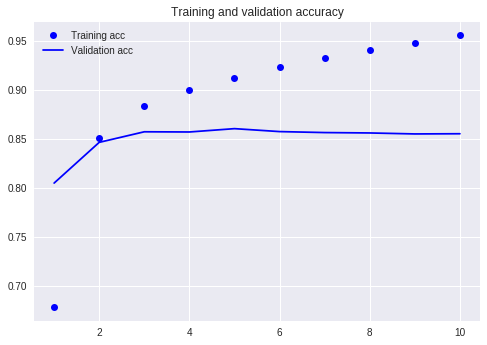

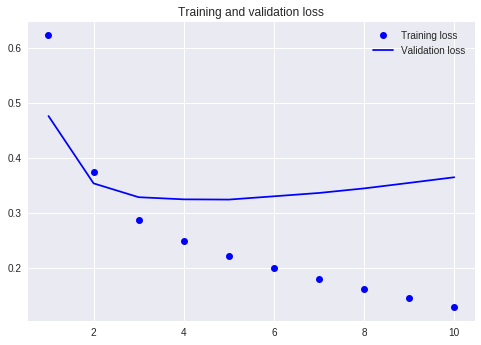

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#**SAVING THE MODEL**

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
for layer in loaded_model.layers:
  layer.trainable = True

In [0]:
from keras import layers
from keras import optimizers
model1 = Sequential()

model1.add(loaded_model)

#model1.add(layers.Flatten())
model1.add(layers.Dense(2,activation='sigmoid'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 1)                 80801     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 4         
Total params: 80,805
Trainable params: 80,805
Non-trainable params: 0
_________________________________________________________________


In [0]:
import pandas as pd
df = pd.read_csv('mod.csv')
df.text=df.text.astype(str)
df = df.drop(columns='Unnamed: 0')
df.head()


,sentiment,text
0,positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,positive,Stock-based compensation totaled $2.3 billion....
2,neutral,"For opening remarks, I will be turning the cal..."
3,positive,[Operator Instructions]. Our first question wi...
4,positive,"Hey, thanks. So I guess the question I have an..."


In [0]:
df_test = df[df['sentiment'] != 'neutral']
df_test['sentiment'] = df_test['sentiment'].replace({'positive': 0,'negative':1})
X, y = (df_test['text'].values, df_test['sentiment'].values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding='post')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)

In [0]:
import numpy as np
from keras.utils import to_categorical
num_classes = 2
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
model1.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['acc'])

In [0]:
history = model1.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_split=0.2)

Train on 488 samples, validate on 122 samples
Epoch 1/25
488/488 [==============================] - 0s 789us/step - loss: 0.7744 - acc: 0.3145 - val_loss: 0.7149 - val_acc: 0.5656
Epoch 2/25
488/488 [==============================] - 0s 84us/step - loss: 0.7113 - acc: 0.6178 - val_loss: 0.6904 - val_acc: 0.7172
Epoch 3/25
488/488 [==============================] - 0s 78us/step - loss: 0.6898 - acc: 0.7111 - val_loss: 0.6792 - val_acc: 0.7951
Epoch 4/25
488/488 [==============================] - 0s 82us/step - loss: 0.6778 - acc: 0.7592 - val_loss: 0.6713 - val_acc: 0.8074
Epoch 5/25
488/488 [==============================] - 0s 77us/step - loss: 0.6695 - acc: 0.7807 - val_loss: 0.6641 - val_acc: 0.8074
Epoch 6/25
488/488 [==============================] - 0s 74us/step - loss: 0.6619 - acc: 0.7971 - val_loss: 0.6576 - val_acc: 0.8074
Epoch 7/25
488/488 [==============================] - 0s 85us/step - loss: 0.6553 - acc: 0.7992 - val_loss: 0.6519 - val_acc: 0.8115
Epoch 8/25
488/488 [==

204/204 [==============================] - 0s 43us/step
Test Loss: 0.5725423962462182 Test Accuracy: 0.813725491364797


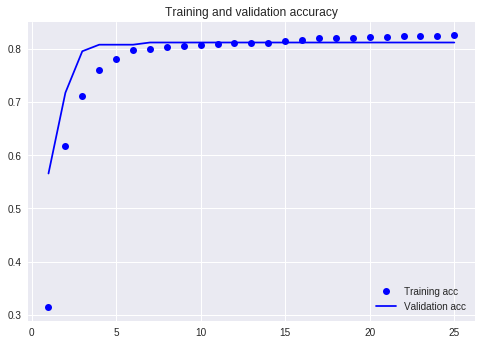

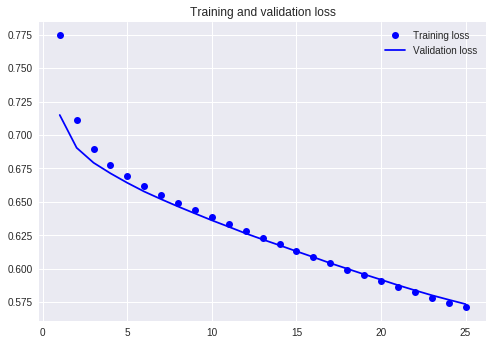

In [0]:
score = model1.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0], 'Test Accuracy:', score[1])

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(X_test)
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[165   3]
 [ 36   0]]
